# Inverse Survival Function (ISF):

Pamiętamy, że Survival Function miała postać 

$$
SF(x)=1-CDF(x).
$$

Pamiętamy również, żę Percentile Point Function (PPF) odwrotna do dystrybunanty miała postać: 

$$
PPF(x)=CDF^{-1}(x).
$$

Funkcja PPF pozwalała nam liczyć kwantyle, czyli rozwiązać problem:

Jak znaleźć najmniejszą taką wartość, że jest ona większa od $p$ (np. $p=0.75$) innych liczb. 

Funkcja ISF to funkcja odwrotna do $SF$:

$$
ISF(x)=SF^{-1}(x).
$$

Za pomocą ISF możemy rozwiązać problem:

Jak znaleźć największą taką wartość, że jest ona mniejsza od $p$ (np. $p=0.75$) innych liczb. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Będziemy liczyć kwantyl rzędu $p=0.5$

In [2]:
p=0.75

Zdefiniujmy zmienną losową o rozkładzie Normalnym

In [4]:
(mu, sigma)=(0,1)
gauss=stats.norm(mu, sigma)

# Zadanie 1
Narysuj na oddzielnych wykresach: 
<ul>
<li> gęstość rozkładu normalnego </li>
<li> jeden minus dystrybuanta rozkładu normalnego ($1-CDF(x)$) </li>
<li> funkcję $ISF$ </li>
</ul>

i zaznacz na nich odpowiednie wartości tak, by móc odtworzyć poniższy rysunek.

x0 = -0.6745
pole pod wykresem = całka = 0.75


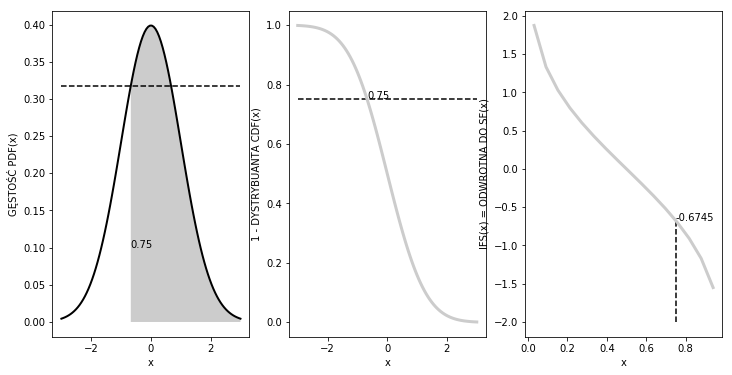

In [11]:
x = np.linspace(-3, 3, 100)
y_pdf = gauss.pdf(x)
p=0.75
x0=stats.norm.ppf(1-p)
(inte,err)=integrate.quad(lambda x: gauss.pdf(x), x0, np.inf)
print('x0 =', np.round(x0,4)) #0.6745
print('pole pod wykresem = całka =',np.round(inte,4)) #0.75

# przedział (x0, 3)
x1=np.linspace(x0, 3)
y1_pdf=gauss.pdf(x1)

fig, ax = plt.subplots(1,3, figsize=(12,6))

# funkcja gęstości
ax[0].plot(x, y_pdf, lw=2, c='k')
ax[0].set_xlabel('x')
ax[0].set_ylabel('GĘSTOŚĆ PDF(x)')
ax[0].fill_between(x1, y1_pdf, facecolor='#CCCCCC')
ax[0].text(x0, 0.1, np.round(inte,4))
ax[0].hlines(gauss.pdf(x0), -3, 3, linestyles='--')


# 1 - dystrybuanta
y2_cdf=1-gauss.cdf(x)

ax[1].plot(x, y2_cdf, lw=3, c='#CCCCCC')
ax[1].set_xlabel('x')
ax[1].set_ylabel('1 - DYSTRYBUANTA CDF(x)')
ax[1].text(x0, 1-gauss.cdf(x0), np.round(1-gauss.cdf(x0),4))
ax[1].hlines(p, -3, 3, linestyles='--')

# ISF = funkcja odwrotna do SF
y3_isf = gauss.isf(x)

ax[2].plot(x, y3_isf, lw=3, c='#CCCCCC')
ax[2].set_xlabel('x')
ax[2].set_ylabel('IFS(x) = ODWROTNA DO SF(x)')
ax[2].text(p, gauss.isf(p), np.round(gauss.isf(p),4))
ax[2].vlines(p, -2, gauss.isf(p), linestyles='--')

plt.show()

0.75


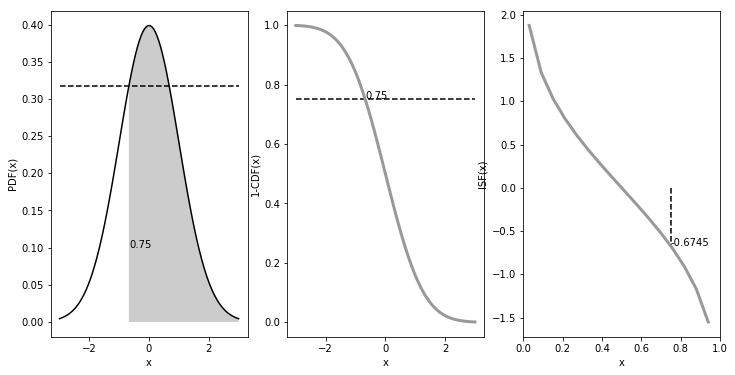